📊 기상 예측 프로젝트 EDA
1. 📁 데이터 개요 (Dataset Overview)
데이터 크기, 컬럼 수, 타입

주요 컬럼: 
YMD                             int64
STN_ID                          int64
LAT                           float64
LON                           float64
Average_temperature           float64
Sum_rainfall                  float64
Max_rainfall_1H               float64
Max_rainfall_1H_occur_time      int64
Average_humidity              float64
Min_humidity                  float64
Average_wind_speed             object

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 글꼴 설정
plt.rc('font', family='Malgun Gothic')  # 또는 'Nanum Gothic'
# 마이너스 기호 설정
plt.rcParams['axes.unicode_minus'] = False


In [99]:

df = pd.read_csv("../../dataset/weather_data.csv")

print(df.shape)
print(df.describe())

(317859, 12)
             Spot_id           YMD         STN_ID            LAT  \
count  317859.000000  3.178590e+05  317859.000000  317859.000000   
mean    10250.065252  2.023901e+07     374.967319      37.554646   
std      9046.297756  6.965183e+03     141.137836       0.036219   
min      5201.000000  2.023040e+07     108.000000      37.463470   
25%      6102.000000  2.023101e+07     403.000000      37.533440   
50%      6904.000000  2.024043e+07     413.000000      37.552360   
75%      7606.000000  2.024111e+07     419.000000      37.571420   
max     42804.000000  2.025053e+07     889.000000      37.734760   

                 LON  Average_temperature   Sum_rainfall  Max_rainfall_1H  \
count  317859.000000        317859.000000  317488.000000    317488.000000   
mean      126.980114            18.330402     -69.313524       -72.724761   
std         0.058691            13.876891      51.328019        46.415939   
min       126.762440           -99.900000     -99.900000       -99

In [107]:

print(df.isnull().sum())

Spot_id                       0
YMD                           0
STN_ID                        0
LAT                           0
LON                           0
Average_temperature           0
Sum_rainfall                  0
Max_rainfall_1H               0
Max_rainfall_1H_occur_time    0
Average_humidity              0
Min_humidity                  0
dtype: int64



2. 📤 결측치 및 이상값 확인
목적: 데이터 정제 기준 설정
결측치 비율 분포
박스플롯 이상값 탐색


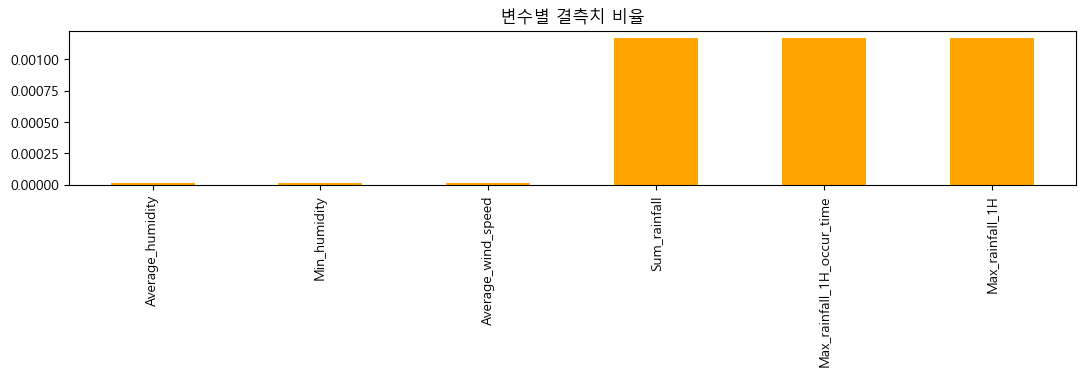

In [101]:
# 변수별 결측치의 비율을 plot으로 그려보면 아래와 같습니다.
fig = plt.figure(figsize=(13, 2))
missing = df.isnull().sum() / df.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()

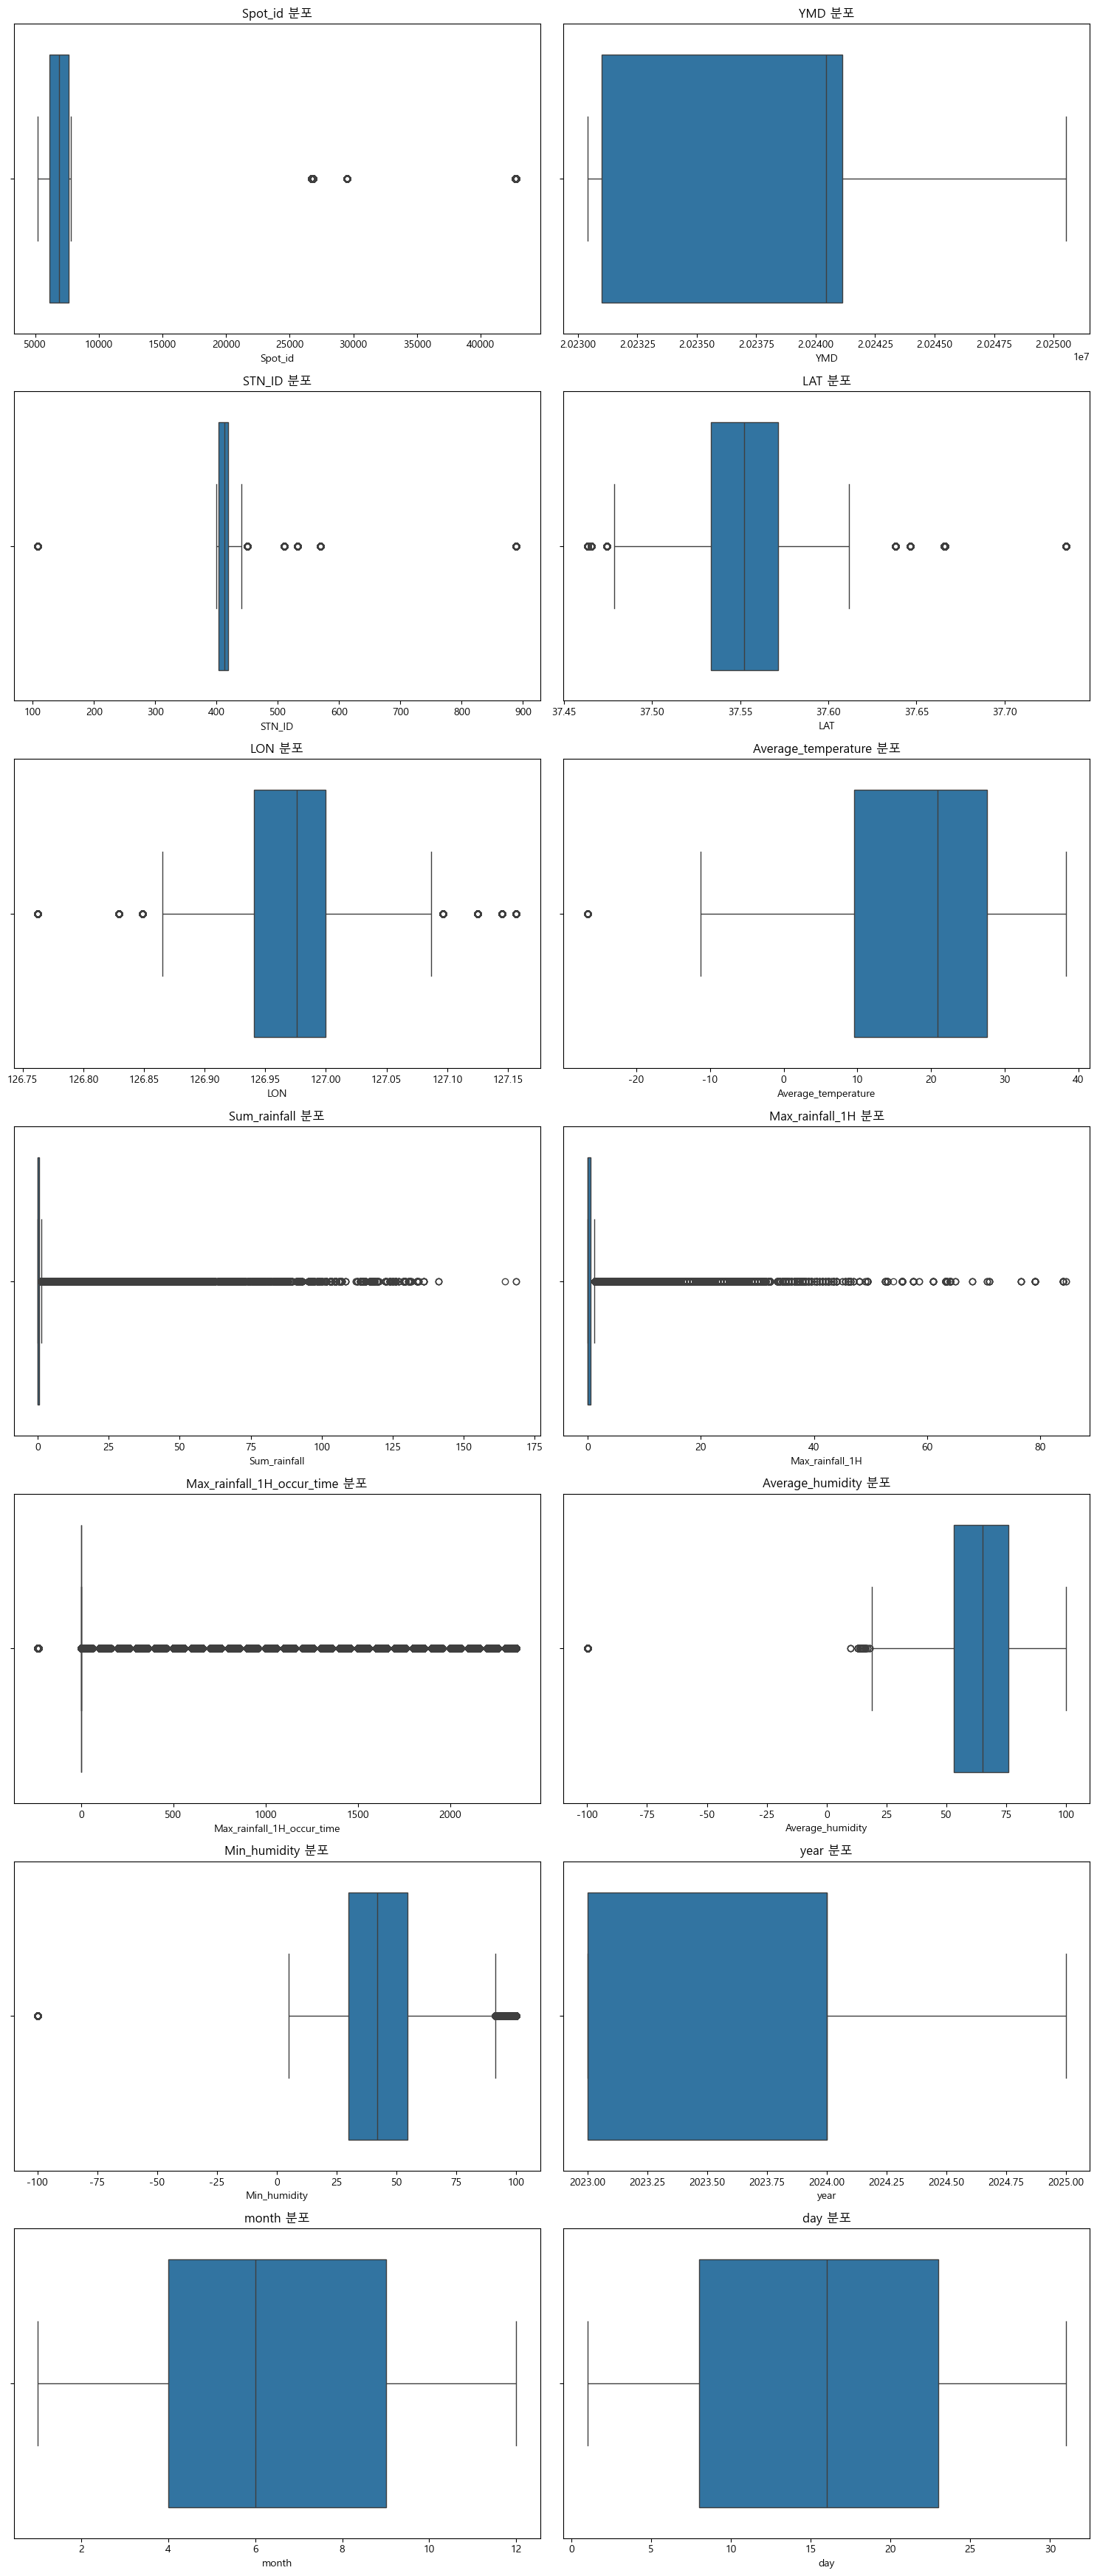

In [123]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# numeric_columns = [col for col in numeric_columns if col != 'target']  # target 제외
# df = processor.detect_outliers(df, numeric_columns)
outlier_info = {}
        
# 박스플롯 그리기
plt.figure(figsize=(15, 5 * ((len(numeric_columns) + 1) // 2)))
for idx, column in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 1) // 2, 2, idx)
    sns.boxplot(x=df[column])
    plt.title(f'{column} 분포')
    
    # IQR 방식으로 이상치 탐지
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)][column]
    
    outlier_info[column] = {
        'outlier_count': len(outliers),
        'outlier_percentage': (len(outliers) / len(df)) * 100,
        'min': df[column].min(),
        'max': df[column].max(),
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR
    }

plt.tight_layout()
plt.show()


In [108]:
#columns = ['Average_temperature', 'Average_humidity', 'Min_humidity']    
columns = ['Average_temperature']     
for col in columns:  
    df[col].replace(-99.9, np.nan, inplace=True)
    
    
df.fillna(method="ffill").fillna(method="bfill")

df.head()

C:\Users\huyuh\AppData\Local\Temp\ipykernel_42928\2654262284.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\huyuh\AppData\Local\Temp\ipykernel_42928\2654262284.py:7: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Spot_id,YMD,STN_ID,LAT,LON,Average_temperature,Sum_rainfall,Max_rainfall_1H,Max_rainfall_1H_occur_time,Average_humidity,Min_humidity
0,6001,20230401,408,37.58463,127.06036,25.8,0.0,0.0,1.0,31.0,13.2
1,6001,20230401,414,37.61172,126.99944,24.6,0.0,0.0,1.0,31.0,13.5
2,6001,20230401,424,37.63801,127.00981,25.1,0.0,0.0,1.0,36.0,12.9
3,6001,20230402,408,37.58463,127.06036,25.1,0.0,0.0,1.0,22.0,11.8
4,6001,20230402,414,37.61172,126.99944,23.7,0.0,0.0,1.0,22.0,12.0


In [106]:
# 이상치 제거            
columns = ['Sum_rainfall', 'Max_rainfall_1H']
# 각 컬럼에 대해 -99.9 값을 NaN으로 대체한 후, NaN을 0으로 대체
for col in columns:
    df[col].replace(-99.9, 0, inplace=True)  



# 칼럼 삭제
columns_to_drop = ['Average_wind_speed'] # 삭제할 컬럼 있으면 추가할 것
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=columns_to_drop)

df.head()

C:\Users\huyuh\AppData\Local\Temp\ipykernel_42928\3836233954.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Spot_id,YMD,STN_ID,LAT,LON,Average_temperature,Sum_rainfall,Max_rainfall_1H,Max_rainfall_1H_occur_time,Average_humidity,Min_humidity
0,6001,20230401,408,37.58463,127.06036,25.8,0.0,0.0,1.0,31.0,13.2
1,6001,20230401,414,37.61172,126.99944,24.6,0.0,0.0,1.0,31.0,13.5
2,6001,20230401,424,37.63801,127.00981,25.1,0.0,0.0,1.0,36.0,12.9
3,6001,20230402,408,37.58463,127.06036,25.1,0.0,0.0,1.0,22.0,11.8
4,6001,20230402,414,37.61172,126.99944,23.7,0.0,0.0,1.0,22.0,12.0



3. 📈 시계열 분포 분석 (Temporal Patterns)
목적: 계절성/추세/주기 확인
온도/강수량/습도도의 월별 평균


In [109]:
df['year'] = df['YMD'].astype(str).str[:4].astype(int)
df['month'] = df['YMD'].astype(str).str[4:6].astype(int)
df['day'] = df['YMD'].astype(str).str[6:8].astype(int)


(array([20227500., 20230000., 20232500., 20235000., 20237500., 20240000.,
        20242500., 20245000., 20247500., 20250000., 20252500.]),
 [Text(20227500.0, 0, '2.02275'),
  Text(20230000.0, 0, '2.02300'),
  Text(20232500.0, 0, '2.02325'),
  Text(20235000.0, 0, '2.02350'),
  Text(20237500.0, 0, '2.02375'),
  Text(20240000.0, 0, '2.02400'),
  Text(20242500.0, 0, '2.02425'),
  Text(20245000.0, 0, '2.02450'),
  Text(20247500.0, 0, '2.02475'),
  Text(20250000.0, 0, '2.02500'),
  Text(20252500.0, 0, '2.02525')])

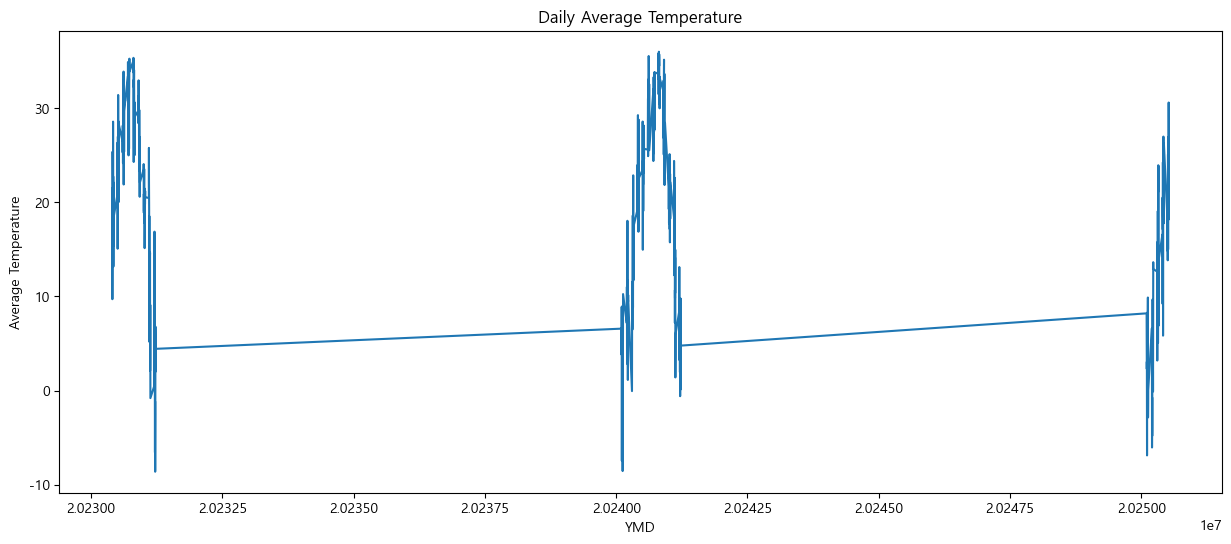

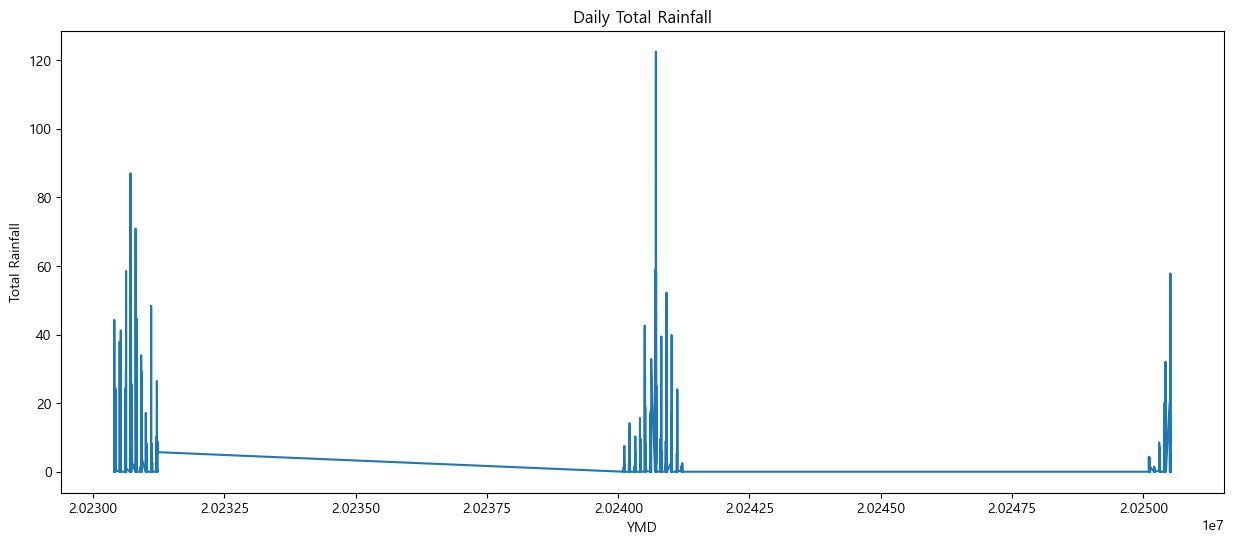

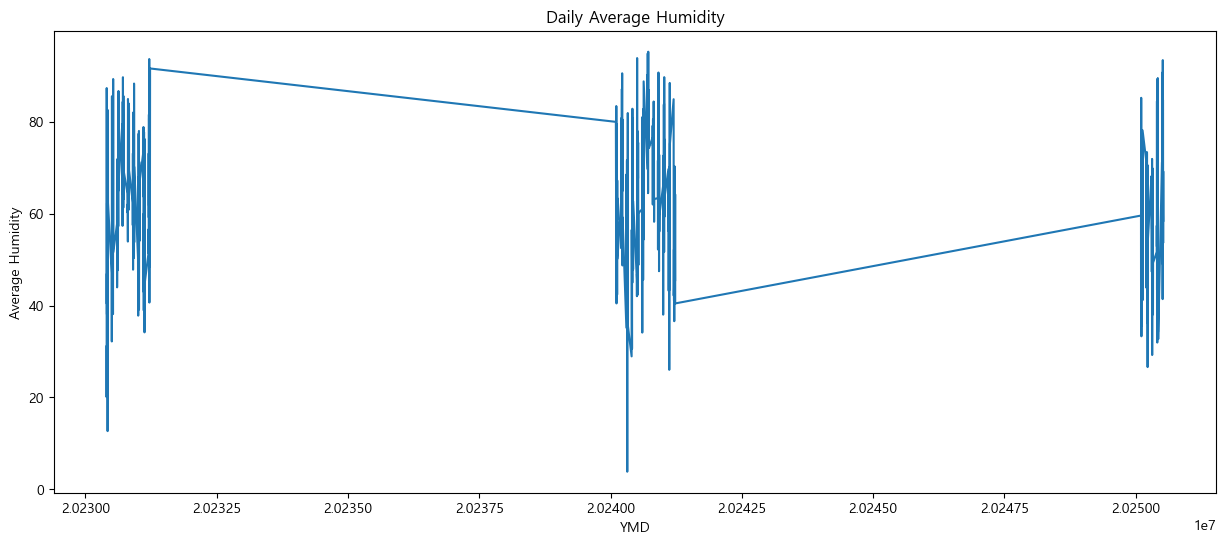

In [111]:

# 일별 평균 기온 시각화
plt.figure(figsize=(15, 6))
# plt.subplot(2,3,1)
YMD_avg_temp = df.groupby('YMD')['Average_temperature'].mean()
YMD_avg_temp.plot(kind='line') 
plt.title('Daily Average Temperature')
plt.xlabel('YMD')
plt.ylabel('Average Temperature')
plt.xticks(rotation=0)

# 일별 총강수량 시각화
plt.figure(figsize=(15, 6))
# plt.subplot(2,3,2)
YMD_sum_rainfall = df.groupby('YMD')['Sum_rainfall'].mean()
YMD_sum_rainfall.plot(kind='line')
plt.title('Daily Total Rainfall')
plt.xlabel('YMD')
plt.ylabel('Total Rainfall')
plt.xticks(rotation=0)

# 일별 평균 습도 시각화
plt.figure(figsize=(15, 6))
# plt.subplot(2,3,3)
YMD_avg_humidity = df.groupby('YMD')['Average_humidity'].mean()
YMD_avg_humidity.plot(kind='line')
plt.title('Daily Average Humidity')
plt.xlabel('YMD')
plt.ylabel('Average Humidity')
plt.xticks(rotation=0)



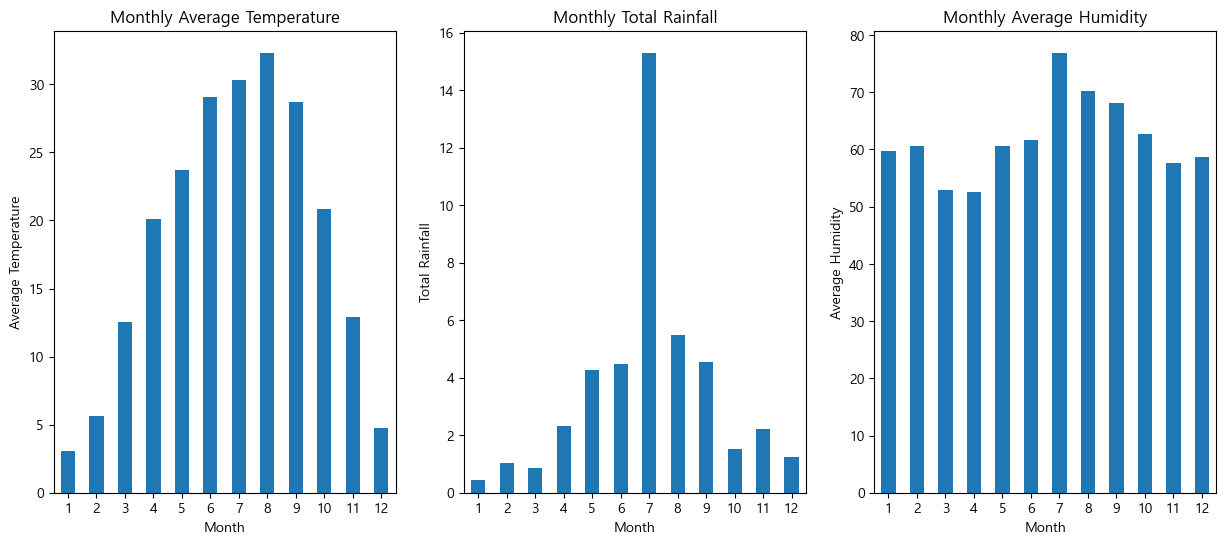

In [112]:

# 월별 평균 기온 시각화
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
monthly_avg_temp = df.groupby('month')['Average_temperature'].mean()
monthly_avg_temp.plot(kind='bar')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(rotation=0)

# 월별 평균 강수량 시각화
plt.subplot(1,3,2)
monthly_sum_rainfall = df.groupby('month')['Sum_rainfall'].mean()
monthly_sum_rainfall.plot(kind='bar')
plt.title('Monthly Total Rainfall')
plt.xlabel('Month')
plt.ylabel('Total Rainfall')
plt.xticks(rotation=0)

# 월별 평균 강수량 시각화
plt.subplot(1,3,3)
monthly_avg_humidity = df.groupby('month')['Average_humidity'].mean()
monthly_avg_humidity.plot(kind='bar')
plt.title('Monthly Average Humidity')
plt.xlabel('Month')
plt.ylabel('Average Humidity')
plt.xticks(rotation=0)

plt.show()

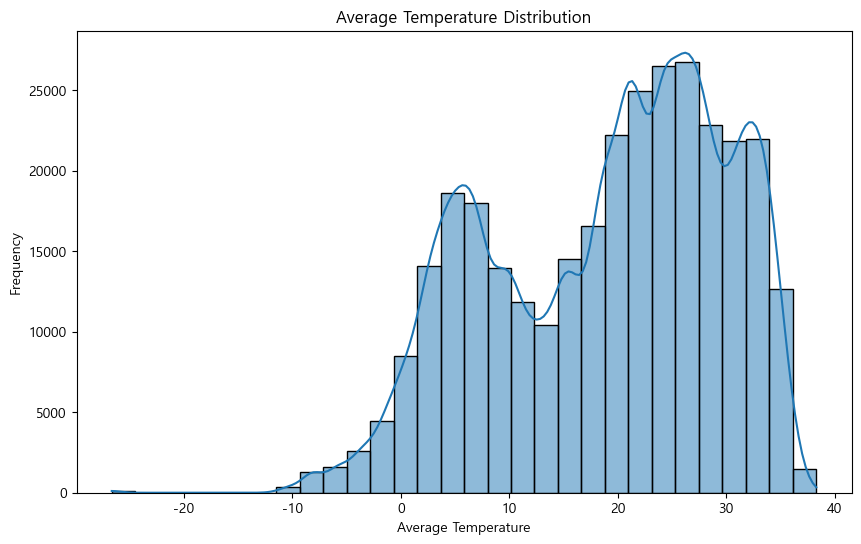

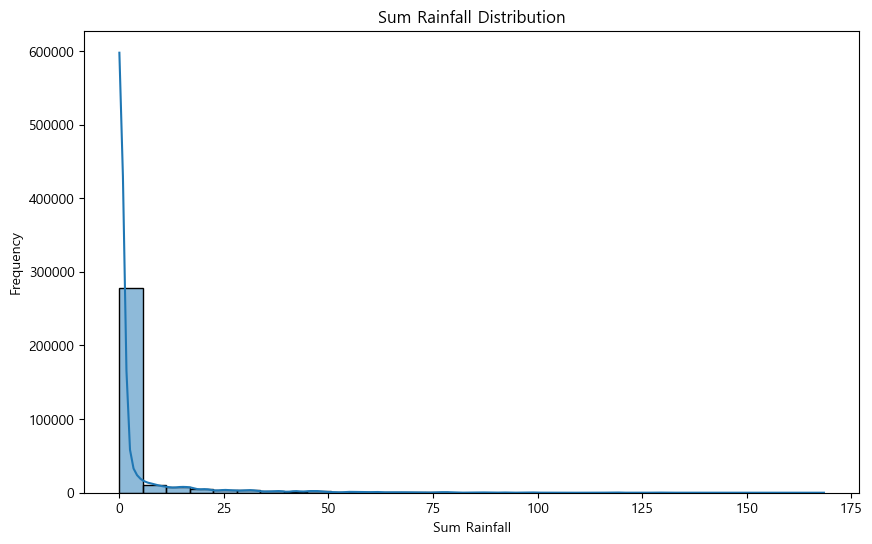

In [113]:

# 기온 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['Average_temperature'], bins=30, kde=True)
plt.title('Average Temperature Distribution')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

# 강수량 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['Sum_rainfall'], bins=30, kde=True)
plt.title('Sum Rainfall Distribution')
plt.xlabel('Sum Rainfall')
plt.ylabel('Frequency')
plt.show()

4. 지역별 분석 (Spatial Distribution)
목적: 지역 편차, 기후군 구분
지역별 평균 기온, 강수량 막대그래프

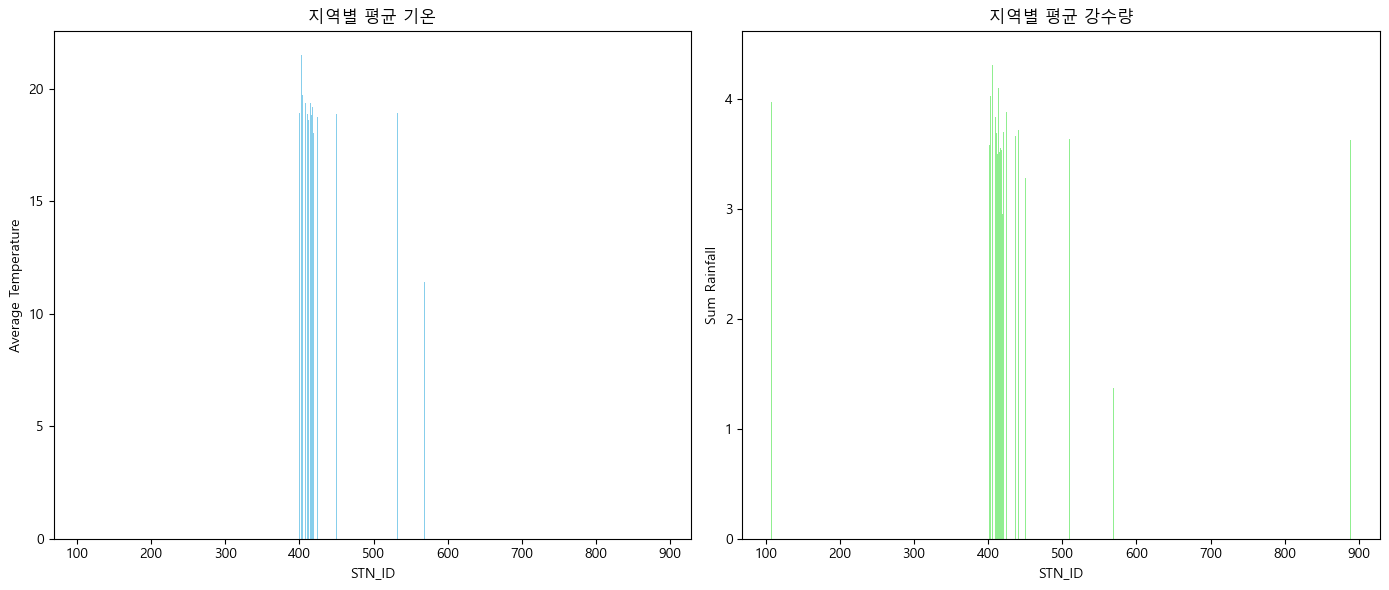

In [114]:
# 지역별 평균 기온과 강수량 계산
region_avg = df.groupby('STN_ID').agg({'Average_temperature': 'mean', 'Sum_rainfall': 'mean'}).reset_index()

# 막대 그래프 시각화
plt.figure(figsize=(14, 6))

# 평균 기온
plt.subplot(1, 2, 1)
plt.bar(region_avg['STN_ID'], region_avg['Average_temperature'], color='skyblue')
plt.title('지역별 평균 기온')
plt.xlabel('STN_ID')
plt.ylabel('Average Temperature')

# 평균 강수량
plt.subplot(1, 2, 2)
plt.bar(region_avg['STN_ID'], region_avg['Sum_rainfall'], color='lightgreen')
plt.title('지역별 평균 강수량')
plt.xlabel('STN_ID')
plt.ylabel('Sum Rainfall')

plt.tight_layout()
plt.show()

In [115]:
# 지도 시각화 (GeoPandas or Folium)
import folium

# 지점별 평균 기온 및 강수량 계산
agg_df = df.groupby(['STN_ID', 'LAT', 'LON'], as_index=False)[['Average_temperature', 'Sum_rainfall']].mean()

# 지도 생성 (중앙 좌표 기준)
map_center = [agg_df['LAT'].mean(), agg_df['LON'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# 마커 추가
for _, row in agg_df.iterrows():
    popup_text = f"STN_ID: {row['STN_ID']}<br>Avg Temp: {row['Average_temperature']:.2f}°C<br>Rainfall: {row['Sum_rainfall']:.2f}mm"
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=row['Average_temperature'],  # 온도에 비례한 크기
        color='blue',
        fill=True,
        fill_color='orange',
        popup=folium.Popup(popup_text, max_width=250)
    ).add_to(m)

# 저장 및 보기
m.save("weather_map.html")

In [78]:
import plotly.express as px

# 평균 계산
agg_df = df.groupby(['STN_ID', 'LAT', 'LON'], as_index=False)[['Average_temperature', 'Sum_rainfall']].mean()

# Bubble map
fig = px.scatter_map(
    agg_df,
    lat="LAT",
    lon="LON",
    size="Average_temperature",
    color="Sum_rainfall",
    hover_name="STN_ID",
    color_continuous_scale="Blues",
    size_max=15,
    zoom=11,
    map_style="carto-positron",
    title="📍 지역별 평균 기온 & 강수량"
)

fig.show()


5. 🔄 피처 간 상관관계
목적: 다중공선성 제거, 파생변수 후보 확인
수치형 변수 간 상관계수 히트맵

온도 ↔ 습도 ↔ 강수량 관계


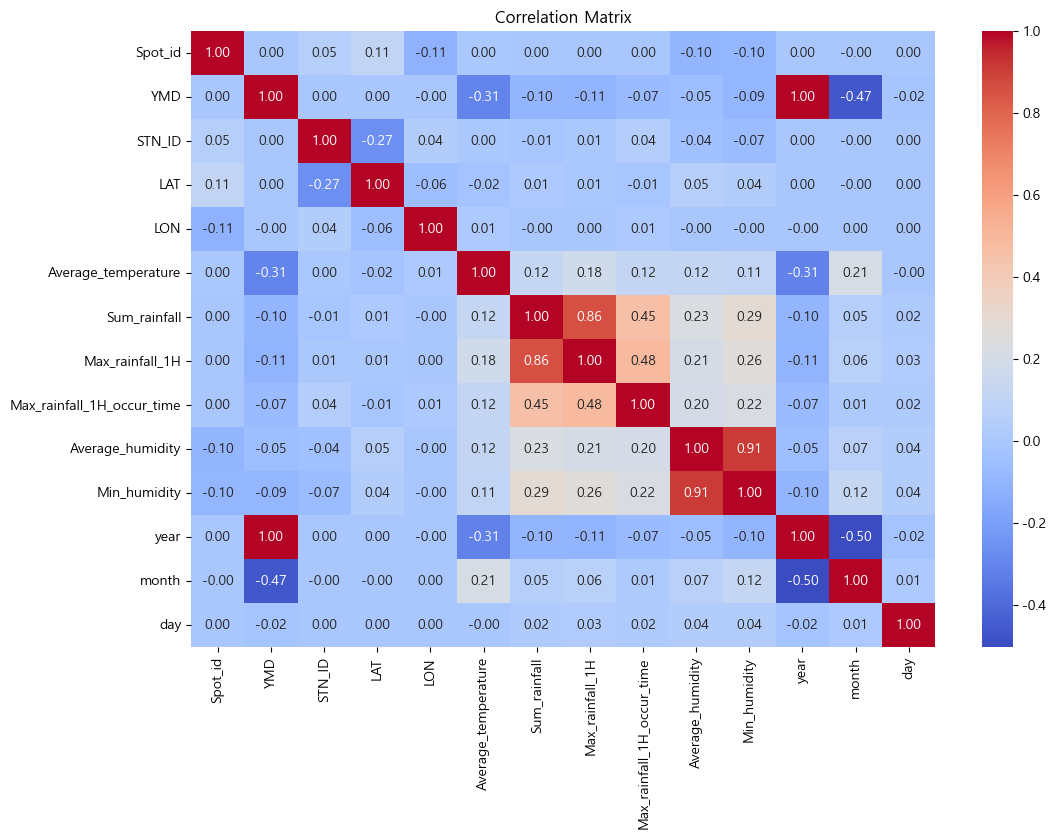

In [116]:

# 상관관계 히트맵
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

                             Spot_id       YMD    STN_ID       LAT       LON  \
Spot_id                     1.000000  0.000323  0.049695  0.105623 -0.110908   
YMD                         0.000323  1.000000  0.001769  0.001415 -0.000715   
STN_ID                      0.049695  0.001769  1.000000 -0.266588  0.043506   
LAT                         0.105623  0.001415 -0.266588  1.000000 -0.056024   
LON                        -0.110908 -0.000715  0.043506 -0.056024  1.000000   
Average_temperature         0.003875 -0.307741  0.003034 -0.021237  0.009706   
Sum_rainfall                0.000457 -0.101848 -0.011785  0.010158 -0.000042   
Max_rainfall_1H             0.001701 -0.107026  0.005017  0.005592  0.000590   
Max_rainfall_1H_occur_time  0.001918 -0.068970  0.044261 -0.011300  0.009644   
Average_humidity           -0.100471 -0.050752 -0.041844  0.050204 -0.001246   
Min_humidity               -0.096662 -0.094214 -0.065401  0.042931 -0.002804   
year                        0.000329  0.

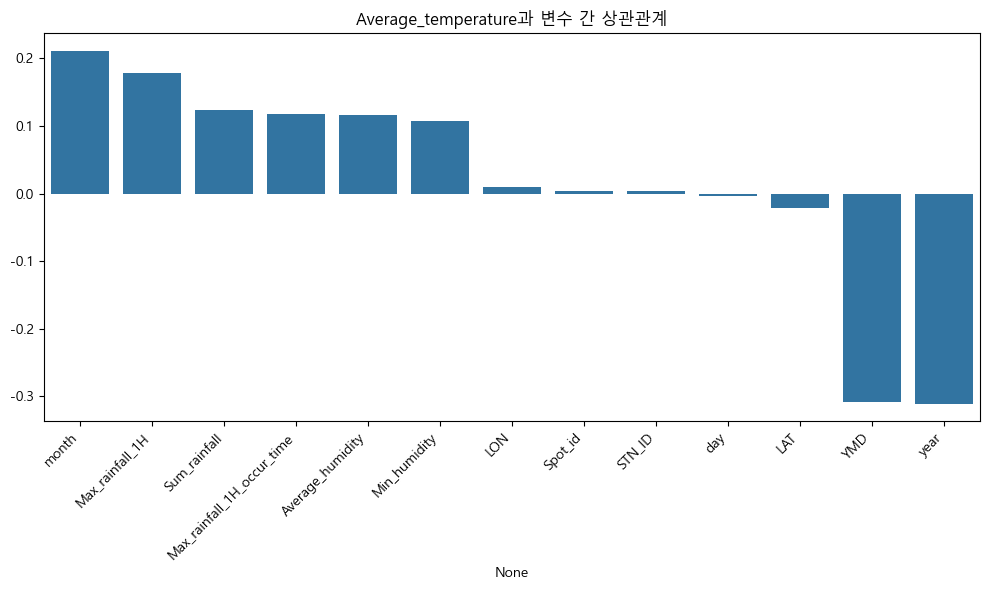


Average_temperature과의 상관관계:
Average_temperature: 1.0000
month: 0.2107
Max_rainfall_1H: 0.1783
Sum_rainfall: 0.1233
Max_rainfall_1H_occur_time: 0.1176
Average_humidity: 0.1154
Min_humidity: 0.1071
LON: 0.0097
Spot_id: 0.0039
STN_ID: 0.0030
day: -0.0033
LAT: -0.0212
YMD: -0.3077
year: -0.3107


In [117]:
target_col = 'Average_temperature'

# target과의 상관관계 계산
correlation_matrix = df.corr()
target_correlation = correlation_matrix[target_col].sort_values(ascending=False)
print(correlation_matrix)

# 상관관계가 높은 상위 변수들 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlation[1:].index, y=target_correlation[1:].values)
plt.title(f'{target_col}과 변수 간 상관관계')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 상관관계 값 출력
print(f"\n{target_col}과의 상관관계:")
for feature, corr in target_correlation.items():
    print(f"{feature}: {corr:.4f}")



5. 📉 타깃 변수의 예측 가능성
목적: 모델 타깃 결정 (회귀 vs 분류) 및 분포 확인
온도/강수량 히스토그램 → 분포 왜도 확인
타깃 변수 정규성 유무 → 로그 변환 여부 판단

기온은 대체로 정규분포에 가까운 연속값이기 때문에 스케일러만 적용 추천천
기온이 0도 이하일 수 있기 때문에 log 또는 log1p는 사용 부적합


<Axes: >

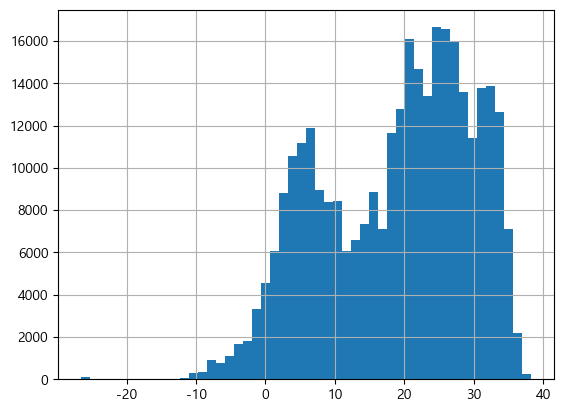

In [118]:

df['Average_temperature'].hist(bins=50)

<Axes: >

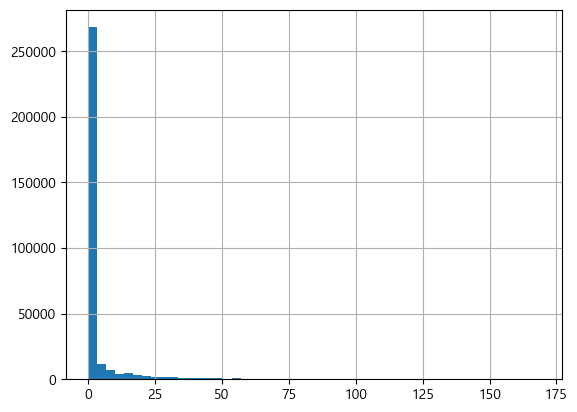

In [121]:

df['Sum_rainfall'].hist(bins=50)